# Overview

Anomaly detection aims to identify data points that significantly differ from the majority of the data.

In [3]:
import pandas as pd

df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check the Class Distribution

Class 0: 284315
Class 1: 492


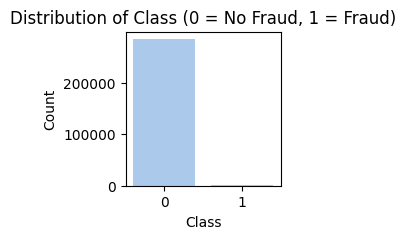

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts=df["Class"].value_counts()

for c, count in enumerate(class_counts):
    print("Class " + str(c) + ": " + str(count))

# visualize class distribution
plt.figure(figsize=(2,2))
sns.countplot(x='Class', data=df, palette='pastel') # palette color
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Time Feature Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


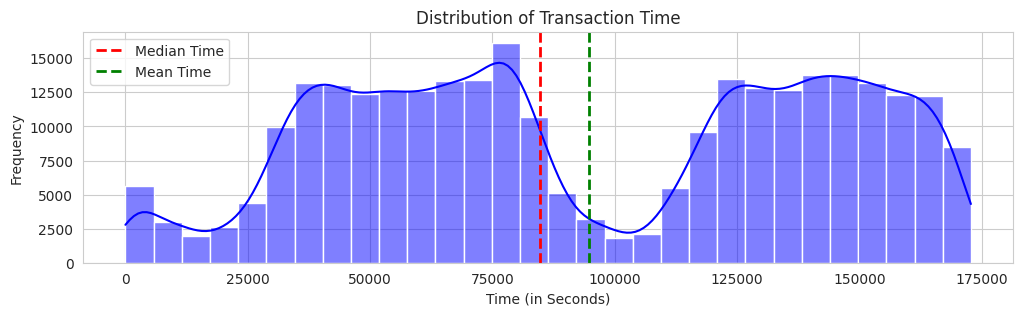

In [8]:
# Histogram
sns.set_style('whitegrid')
plt.figure(figsize=(12, 3))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Frequency")
plt.axvline(x = df['Time'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Time')
plt.axvline(x = df['Time'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean Time')
plt.legend()
plt.show()

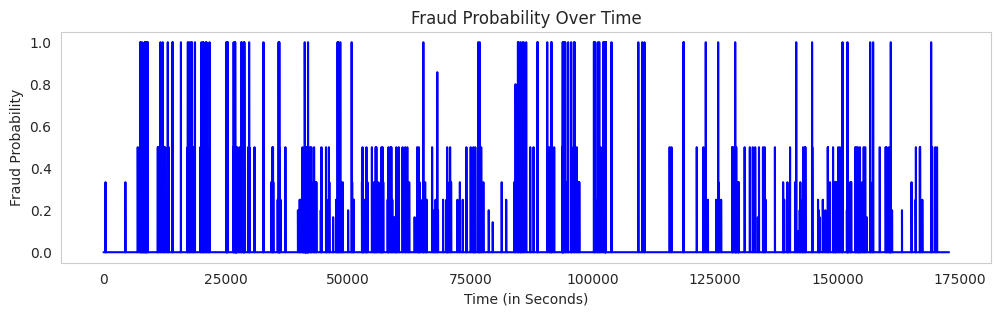

In [9]:
# LinePlot 
# create a line plot to analyze fraud over time 
plt.figure(figsize=(12, 3))
time_fruad = df.groupby('Time')['Class'].mean().reset_index()
plt.plot(time_fruad['Time'], time_fruad['Class'], color='blue')
plt.title('Fraud Probability Over Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Fraud Probability")
plt.grid()
plt.show()

# Correlation Analysis

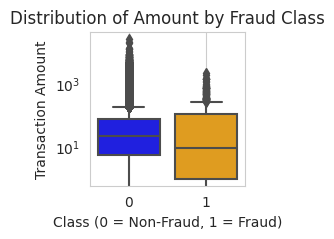

<ipython-input-11-6b557bbca0f0>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)


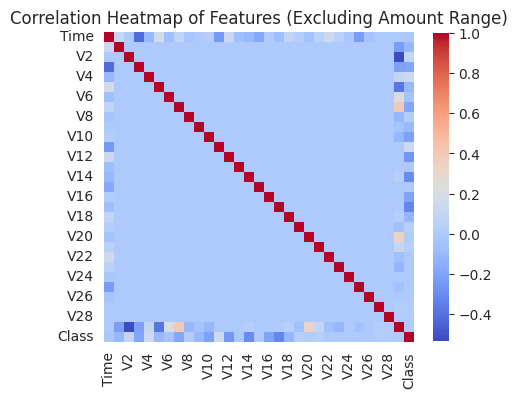

In [11]:
# create a boxplot to visualize the amount of distribution based on fraud classification
plt.figure(figsize=(2, 2))
sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'orange'])
plt.title('Distribution of Amount by Fraud Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.grid()
plt.show()

# calculate the percentage of fraudulent transactions in different ranges 
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df['Amount Range'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# calculate the counts of fraud in each amount range 
fraud_counts = df.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts * 100

# calculate the correlation matrix
corr_matrix = df.drop(columns=['Amount Range']).corr()
# plot the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features (Excluding Amount Range)')
plt.show()

# PCA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

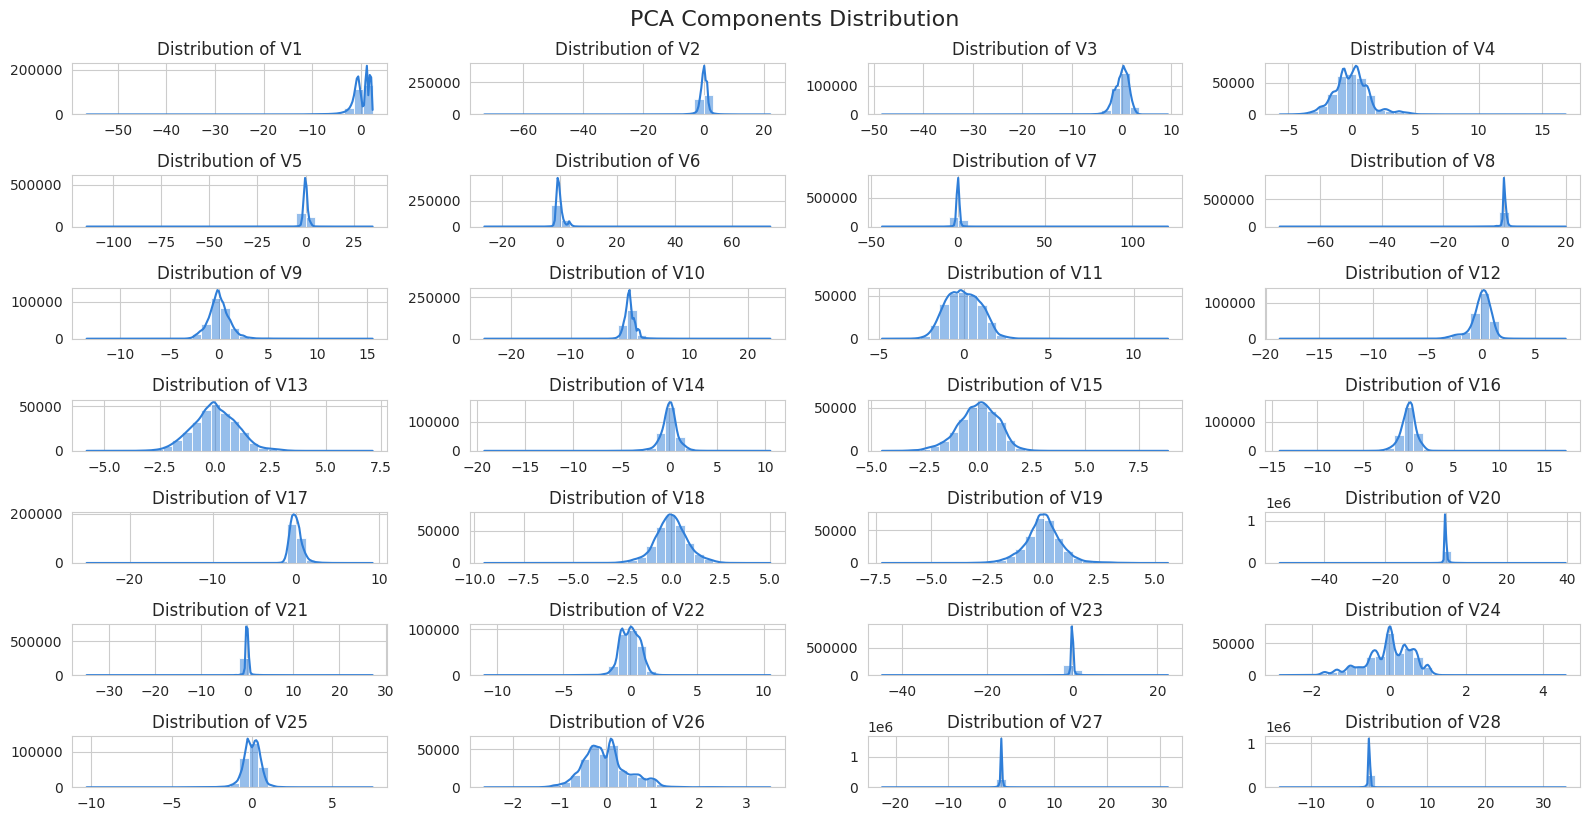

In [12]:
# List of PCA components (V1 to V28)
pca_components = [f'V{i}' for i in range(1, 29)]

# Plotting distributions of PCA components
plt.figure(figsize=(16, 8))
for i, component in enumerate(pca_components, 1):
    plt.subplot(7, 4, i)  # 7 rows and 4 columns for 28 PCA components
    sns.histplot(df[component], kde=True, bins=30, color='#2f7ed8')
    plt.title(f'Distribution of {component}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('PCA Components Distribution', y=1.02, fontsize=16)
plt.show()